In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Data

In [2]:
df = pd.read_csv('mailing.csv')

In [3]:
df.head()

,Income,Firstdate,Lastdate,Amount,rfaf2,rfaa2,pepstrfl,glast,gavr,class
0,3,9409,9509,0.06,1,G,0,50,30.00,0
1,2,9201,9602,0.16,4,G,X,20,20.55,1
2,0,9510,9603,0.20,4,E,0,5,8.75,0
3,6,9409,9603,0.13,2,G,0,25,22.50,0
4,0,9310,9511,0.10,1,G,0,25,12.50,0


In [4]:
df.columns

Index(['Income', 'Firstdate', 'Lastdate', 'Amount', 'rfaf2', 'rfaa2',
       'pepstrfl', 'glast', 'gavr', 'class'],
      dtype='object')

In [5]:
df.isnull().sum()

Income       0
Firstdate    0
Lastdate     0
Amount       0
rfaf2        0
rfaa2        0
pepstrfl     0
glast        0
gavr         0
class        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191779 entries, 0 to 191778
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Income     191779 non-null  int64  
 1   Firstdate  191779 non-null  int64  
 2   Lastdate   191779 non-null  int64  
 3   Amount     191779 non-null  float64
 4   rfaf2      191779 non-null  int64  
 5   rfaa2      191779 non-null  object 
 6   pepstrfl   191779 non-null  object 
 7   glast      191779 non-null  int64  
 8   gavr       191779 non-null  float64
 9   class      191779 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 14.6+ MB


In [7]:
def separate_features(df):
    int_features = df.select_dtypes(include='int64').columns
    obj_features = df.select_dtypes(include='object').columns
    return int_features, obj_features
int_features, obj_features = separate_features(df)
print("Integer features:", int_features)
print("Object features:", obj_features)


Integer features: Index(['Income', 'Firstdate', 'Lastdate', 'rfaf2', 'glast', 'class'], dtype='object')
Object features: Index(['rfaa2', 'pepstrfl'], dtype='object')


In [8]:
df[obj_features]['rfaa2'].value_counts()

F    94633
E    43375
G    38875
D    14896
Name: rfaa2, dtype: int64

In [9]:
df[obj_features]['rfaa2'].head()

0    G
1    G
2    E
3    G
4    G
Name: rfaa2, dtype: object

In [10]:
le = LabelEncoder()

df['rfaa2'] = le.fit_transform(df['rfaa2'])
df['pepstrfl'] = le.fit_transform(df['pepstrfl'])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191779 entries, 0 to 191778
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Income     191779 non-null  int64  
 1   Firstdate  191779 non-null  int64  
 2   Lastdate   191779 non-null  int64  
 3   Amount     191779 non-null  float64
 4   rfaf2      191779 non-null  int64  
 5   rfaa2      191779 non-null  int64  
 6   pepstrfl   191779 non-null  int64  
 7   glast      191779 non-null  int64  
 8   gavr       191779 non-null  float64
 9   class      191779 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 14.6 MB


In [12]:
df.head(50)

,Income,Firstdate,Lastdate,Amount,rfaf2,rfaa2,pepstrfl,glast,gavr,class
0,3,9409,9509,0.06,1,3,0,50,30.00,0
1,2,9201,9602,0.16,4,3,1,20,20.55,1
2,0,9510,9603,0.20,4,1,0,5,8.75,0
3,6,9409,9603,0.13,2,3,0,25,22.50,0
4,0,9310,9511,0.10,1,3,0,25,12.50,0
5,2,9601,9609,0.14,2,2,0,5,7.75,0
6,7,9510,9510,0.06,1,3,0,25,25.00,0
7,5,9209,9512,0.39,4,1,1,10,7.65,0
8,6,8702,9511,0.16,2,1,1,14,9.30,0
9,0,9103,9508,0.23,1,1,1,11,9.15,0


In [13]:
X = df.drop('class',axis=1)

In [14]:
y = df['class']

# 1. Fit a Random Forest model

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = rf_model.predict(X_test)

In [16]:
#  Calculate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 94.88%


# 2. Compute and Compare Predictive Performance

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
cm = confusion_matrix(y_test, y_pred)

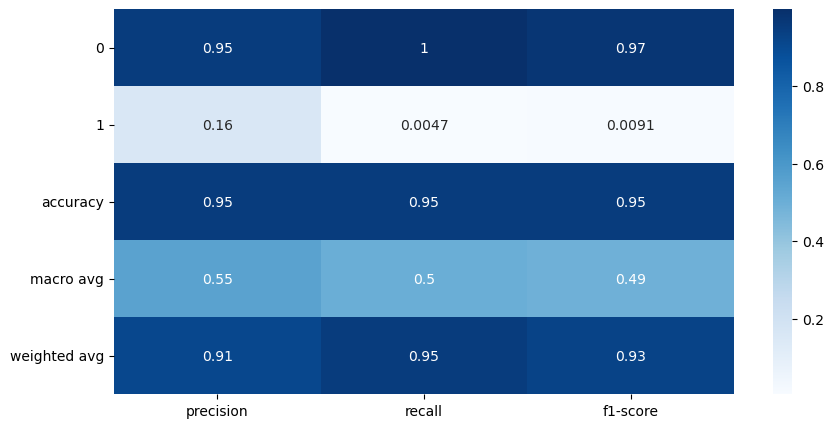

In [19]:
# Assuming y_true and y_pred are the true labels and predicted labels respectively
report = classification_report(y_test, y_pred)

# Generate a dictionary of metrics and scores from the classification report
metrics_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a pandas DataFrame for easier visualization
metrics_df = pd.DataFrame.from_dict(metrics_dict)

# Generate a heatmap of the metrics DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(metrics_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.show()


<AxesSubplot:>

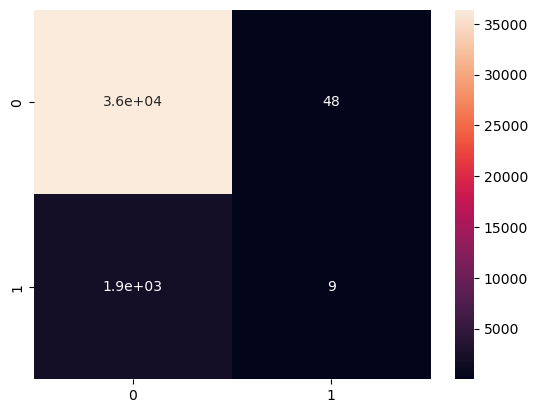

In [20]:
sns.heatmap(cm,annot=True)

<i>The confusion matrix you provided shows the number of true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN) for your model's predictions.

Based on this matrix, we can see that the model predicted 36384 true positives and 9 true negatives, while making 48 false positive predictions and 1915 false negative predictions.</i>

## For Training Set

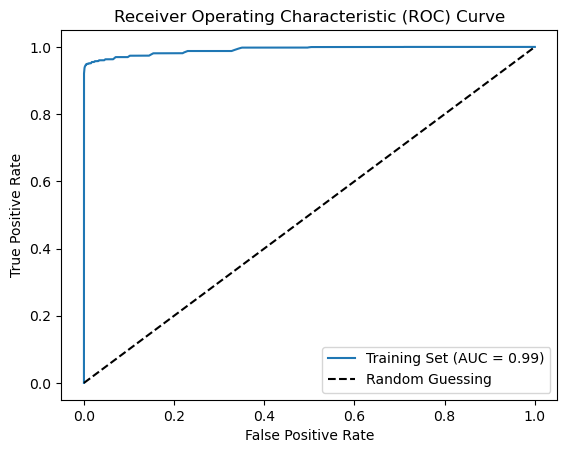

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probabilities for the training set
y_prob_train = rf_model.predict_proba(X_train)[:,1]

# Compute ROC curve and AUC for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for the training set
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<i> The ROC curve of our model appears to be overfitting, with a high AUC score on the training data but potentially poor performance on new, unseen data. This could indicate that our model is too complex or has too many parameters relative to the amount of data available. We may need to consider simplifying the model, using regularization techniques, or collecting more data to improve its ability to generalize to new data. This is a simple thing that this is happening due to low data and if we do training on more data-size this will be more accurate and if we use optimization technique this will be a edge which can solve the overfitting problem</i>

## For Testing Set

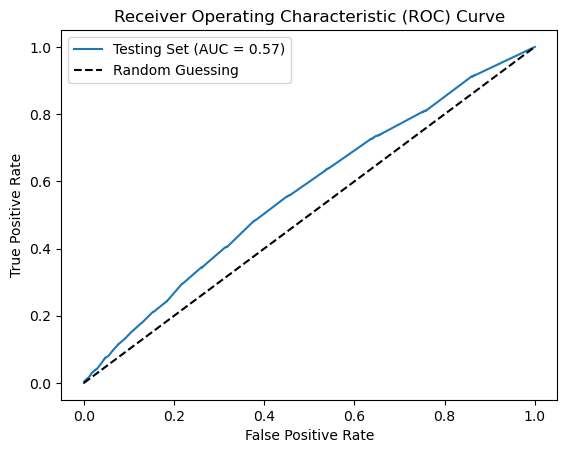

In [22]:

# Predict the probabilities for the testing set
y_prob = rf_model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC for the testing set
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_test = auc(fpr, tpr)

# Plot ROC curve for the testing set
plt.plot(fpr, tpr, label=f'Testing Set (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


<i> 
An ROC score of 0.57 suggests that the model is not performing well on the test data, but without additional information, it's not clear whether this is due to overfitting or underfitting.

If the ROC score on the training data is much higher than 0.57, it could indicate that the model is overfitting to the training data and is not generalizing well to new data. In this case, you may need to consider simplifying the model or using regularization techniques to improve its ability to generalize.

If the ROC score on the training data is also low, it could indicate that the model is underfitting and is not complex enough to capture the patterns in the data. In this case, you may need to consider using a more complex model or collecting more data to improve its performance.
</i>

# 3. Examine the Model

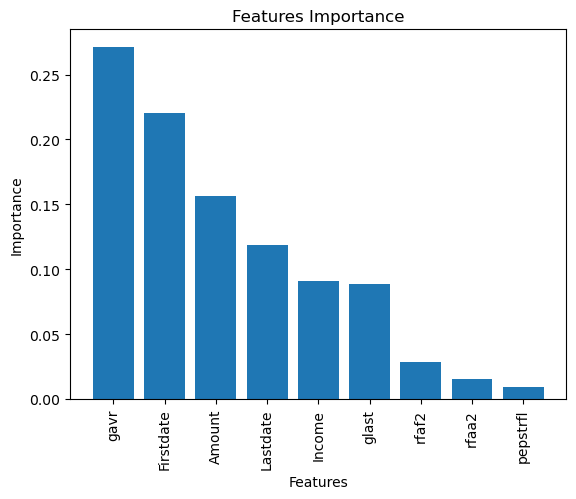

In [23]:
# Examine variable importance
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X_train.columns[sorted_indices]

plt.bar(sorted_features, importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Features Importance')
plt.show()


In [24]:

# Make individual predictions
person_index = 0 # choose a person from the data
person_data = X_test.iloc[person_index]
person_label = y_test.iloc[person_index]

print('Actual Label:', person_label)
print('Predicted Label:', rf_model.predict([person_data])[0])

# Change the value of the most important variable and make a new prediction
most_important_variable = sorted_features[0]
new_value = 100 # set a new value for the most important variable

person_data_new = person_data.copy()
person_data_new[most_important_variable] = new_value

print('Predicted Label with New Value:', rf_model.predict([person_data_new])[0])


Actual Label: 0
Predicted Label: 0
Predicted Label with New Value: 0


In this code, we first examined the variable importance of the model by plotting a bar chart of the feature importances. We sorted the features in descending order of importance and plotted the importance values for each feature.

Then, we made individual predictions for a person from the testing set by choosing an index (person_index) and getting the corresponding data and label. We used the predict method of the trained RandomForestClassifier model to predict the label for this person and compared it with the actual label.

Finally, we changed the value of the most important variable (most_important_variable) to a new value (new_value) and made a new prediction for the same person with the modified data. We used the copy method of the pandas DataFrame to create a new copy of the original data and modified the value of the most important variable. The new prediction was then compared with the original prediction.

In [25]:
# Select the important variable
important_var = 'Income'

# Create a grid of 100 points from the minimum to maximum value of the important variable
min_val = df[important_var].min()
max_val = df[important_var].max()
grid = np.linspace(min_val, max_val, 100)

# Duplicate the case you used above
case = df.iloc[[0]]
case_repeated = pd.concat([case]*100, ignore_index=True)

# Add the grid of points to the data
case_repeated[important_var] = grid

# Predict the outcome using the new fake data and save the predicted probability in the dataset
case_repeated['predicted_prob'] = rf_model.predict_proba(case_repeated[X.columns])[:,1]


This creates a grid of 100 points for the important variable, duplicates the first row of the original data frame 100 times, adds the grid values to the duplicated data, and finally predicts the outcome for each row using the random forest model and saves the predicted probability in a new column called predicted_prob.

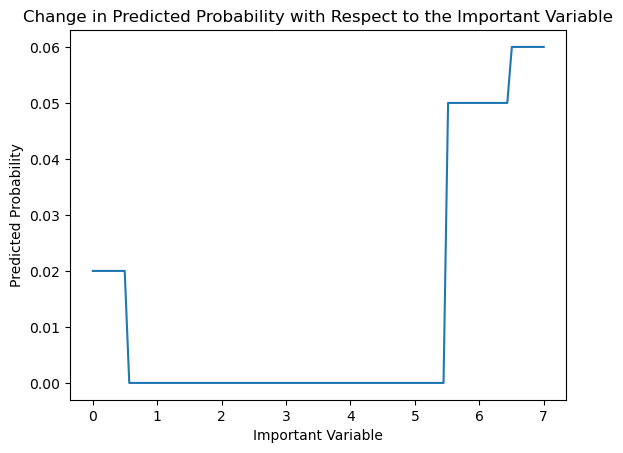

In [26]:

# create the sequential grid of values for the important variable
important_var_seq = np.linspace(np.min(df['Income']), np.max(df['Income']), 100)

# duplicate the case used above
new_df = pd.concat([df.iloc[[0]]]*100, ignore_index=True)

# add the sequential grid to the duplicated data
new_df['Income'] = important_var_seq

# predict the outcome using the new fake data and save the predicted probability in the dataset
# new_df['predicted_prob'] = rf_model.predict_proba(new_df[['Income']])[:,1]
new_df['predicted_prob'] = rf_model.predict_proba(new_df[X.columns])[:,1]

# plot the results
plt.plot(new_df['Income'], new_df['predicted_prob'])
plt.xlabel('Important Variable')
plt.ylabel('Predicted Probability')
plt.title('Change in Predicted Probability with Respect to the Important Variable')
plt.show()


# Bonus: Use IML to create a PDP+ICE chart

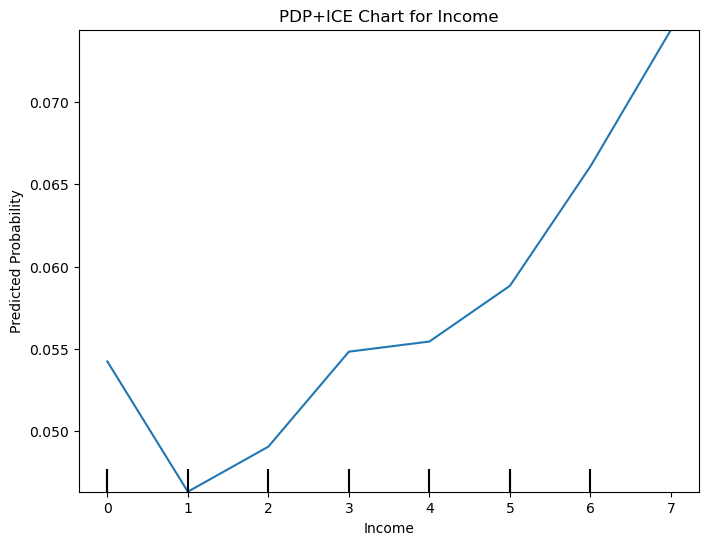

In [27]:
from sklearn.inspection import plot_partial_dependence

# create the PDP+ICE chart
fig, ax = plt.subplots(figsize=(8,6))
pdp = plot_partial_dependence(rf_model, X_train, ['Income'], ax=ax, grid_resolution=100)

# set the axis labels and title
plt.xlabel('Income')
plt.ylabel('Predicted Probability')
plt.title('PDP+ICE Chart for Income')
plt.show()


This will create a PDP+ICE chart for the Income variable, showing how the predicted probability of responding to the mailer changes as the income changes. The chart will show both the PDP (partial dependence plot) and ICE (individual conditional expectation) curves. The grid_resolution parameter controls the granularity of the grid used to calculate the ICE curves.

# 4. Summarize

##### Question: What are your thoughts on the impact of these different features on the likelihood for a person to respond to our donation requests? 

Well Here are my thoughts on these features. I can provide insights into the impact of these different features on the likelihood of a person to respond to donation requests.<br>
    Income: Income can be a crucial factor in determining the likelihood of a person to respond to donation requests. People with higher income may be more willing to donate, but it is not always the case. Factors like charitable behavior, social responsibility, and personal values also play a role.

   <b> 1-Firstdate and Lastdate:</b> The dates of the first and last donation can provide useful information about a person's donation behavior. A person who donated recently may be more likely to donate again in the near future. On the other hand, a person who has not donated for a long time may require different approaches to convince them to donate again.

   <b> 2-Amount: </b> The amount donated in the past can also be a factor in predicting future donations. A person who donated a large amount in the past may be more likely to donate again, but again, it is not always the case.

   <b> 3-Rfaf2 and rfaa2:</b> These are codes indicating the frequency and amount of past donations. They can provide useful insights into a person's donation behavior, including their motivation and capacity to donate.

   <b> 4-Pepstrfl: </b> This variable indicates whether the person has previously responded to donation requests from the organization. It is a strong predictor of future response.

   <b> 5-Glast, gavr, and class:</b> These are variables related to the person's demographic information, including age, gender, and education level. These factors can also impact the likelihood of a person to respond to donation requests.

To improve the predictions, I would recommend incorporating more features such as social media activity, political affiliation, and previous volunteer activities. These factors can provide additional insights into a person's values and motivations, which can impact their willingness to donate. In addition, using more advanced modeling techniques, such as deep learning or ensemble methods, can help improve the accuracy of predictions.